In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from Bio import PDB

In [3]:
msa_dict = {}
time_dict = {}

In [107]:
msa_dict['20_1'] = 27

In [108]:
time_dict['20_2'] = {'features': 1632.2686340808868, 'process_features_model_1_pred_0': 4.832306385040283, 'predict_and_compile_model_1_pred_0': 110.33620119094849, 'relax_model_1_pred_0': 7.784178972244263, 'process_features_model_2_pred_0': 2.1545448303222656, 'predict_and_compile_model_2_pred_0': 112.49587178230286, 'relax_model_2_pred_0': 2.4754443168640137, 'process_features_model_3_pred_0': 1.739295482635498, 'predict_and_compile_model_3_pred_0': 84.019451379776, 'relax_model_3_pred_0': 2.444845199584961, 'process_features_model_4_pred_0': 1.7186493873596191, 'predict_and_compile_model_4_pred_0': 84.77048254013062, 'relax_model_4_pred_0': 2.185905933380127, 'process_features_model_5_pred_0': 1.751570701599121, 'predict_and_compile_model_5_pred_0': 83.627605676651, 'relax_model_5_pred_0': 2.2332229614257812}

In [71]:
print(msa_dict.keys())

dict_keys([195, '10_2', '10_1', '30_2', '40_1', '40_2', '30_1', '50_1', '50_2', '100_1', '100_2', '500_2', '500_1', '600_2', '600_1', '300_1', '400_2', '300_2', '400_1', '1000_1', '1000_2', '900_2', '900_1', '700_1', '700_2', '800_1', '800_2'])


In [72]:
msa_file = '/home/max/stayahead/mutations/scripts/msa_time.json'
af_file = '/home/max/stayahead/mutations/scripts/af_time.json'

In [109]:
with open(af_file, 'w') as file:
        json.dump(time_dict, file, indent=4)

In [110]:
with open(msa_file, 'w') as file:
        json.dump(msa_dict, file, indent=4)

In [75]:
msa_keys = list(msa_dict.keys())
time_keys = list(time_dict.keys())

In [ ]:
# Process data to separate sequence length and number
seq_lengths_1, comp_times_1 = [], []
seq_lengths_2, comp_times_2 = [], []


for key, value in msa_dict.items():
    parts = key.split('_')
    seq_length = int(parts[0]) if parts[0].isdigit() else key
    seq_number = parts[1] if len(parts) > 1 else None
    
    if seq_number == '1':
        seq_lengths_1.append(seq_length)
        comp_times_1.append(value)
    elif seq_number == '2':
        seq_lengths_2.append(seq_length)
        comp_times_2.append(value)
    else:  # For cases without a sequence number, we can decide how to handle these if needed
        pass

# Plot
plt.figure(figsize=(10, 6))

plt.scatter(seq_lengths_1, comp_times_1, color='blue', label='Sequence 1', alpha=0.7)
plt.scatter(seq_lengths_2, comp_times_2, color='red', label='Sequence 2', alpha=0.7)

plt.title('Computational Time by Sequence Length and Number')
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [81]:
print(time_keys)

[195, '10_2', '10_1', '30_2', '40_1', '40_2', '30_1', '50_1', '100_1', '100_2', '500_2', '500_1', '600_2', '600_1', '300_1', '400_2', '300_2', '400_1', '1000_1', '1000_2', '900_2', '900_1', '700_1', '700_2', '800_1', '800_2']


In [88]:
seq_lengths, comp_features = [], []

for key in time_keys:
    tmp_dict = time_dict[key]
    tmp_keys = list(tmp_dict.keys())
    if key == 195 or key == 1273:
        seq_length = int(key)
    else:
        parts = key.split('_')
        seq_length = int(parts[0]) if parts[0].isdigit() else key
    for i in range(len(tmp_keys)):
        if i == 0:
            seq_lengths.append(seq_length)
            tmp_features = (tmp_dict[tmp_keys[i]]/60)
            comp_features.append(tmp_features)         
        

In [90]:
print(comp_features)

[32.232479596138, 24.56698921918869, 24.868181403477987, 26.891394658883414, 26.8354253411293, 27.82762371301651, 28.16548629204432, 32.37535165945689, 32.1233011841774, 32.3910920937856, 30.60194276571274, 33.73642239967982, 33.743892935911816, 33.73528685172399, 34.20726254383723, 33.12908483346303, 40.18805304368337, 41.622973561286926, 32.97299625078837, 30.454871769746145, 30.60503669977188, 31.826034080982208, 24.18383309841156, 24.186593159039816, 24.562929713726042, 28.1266077041626]


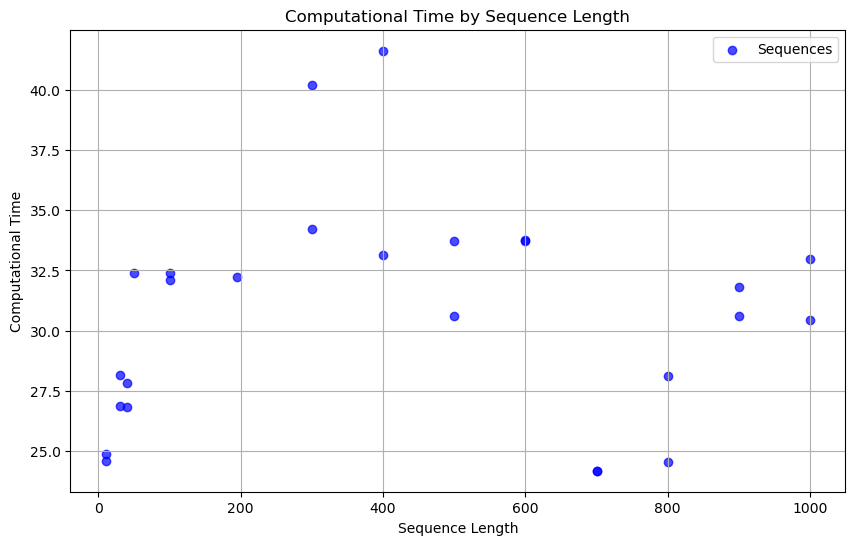

In [111]:
# Plot
plt.figure(figsize=(10, 6))

plt.scatter(seq_lengths, comp_features, color='blue', label='Sequences', alpha=0.7)

plt.title('Computational Time by Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [112]:
seq_lengths_time, total_time = [], []

for key in time_keys:
    tmp_dict = time_dict[key]
    tmp_keys = list(tmp_dict.keys())
    if key == 195 or key == 1273:
        seq_length = int(key)
    else:
        parts = key.split('_')
        seq_length = int(parts[0]) if parts[0].isdigit() else key
    seq_lengths_time.append(seq_length)
    tmp_time = 0
    for i in range(len(tmp_keys)):
        if i > 0:
            tmp_time += tmp_dict[tmp_keys[i]]
    total_time.append(tmp_time/60)

In [99]:
print(seq_lengths_time)

[195, 10, 10, 30, 40, 40, 30, 50, 100, 100, 500, 500, 600, 600, 300, 400, 300, 400, 1000, 1000, 900, 900, 700, 700, 800, 800]


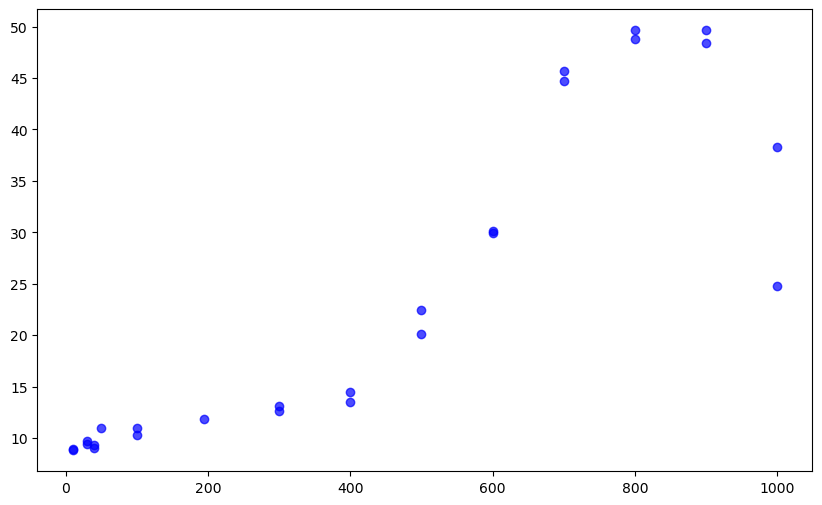

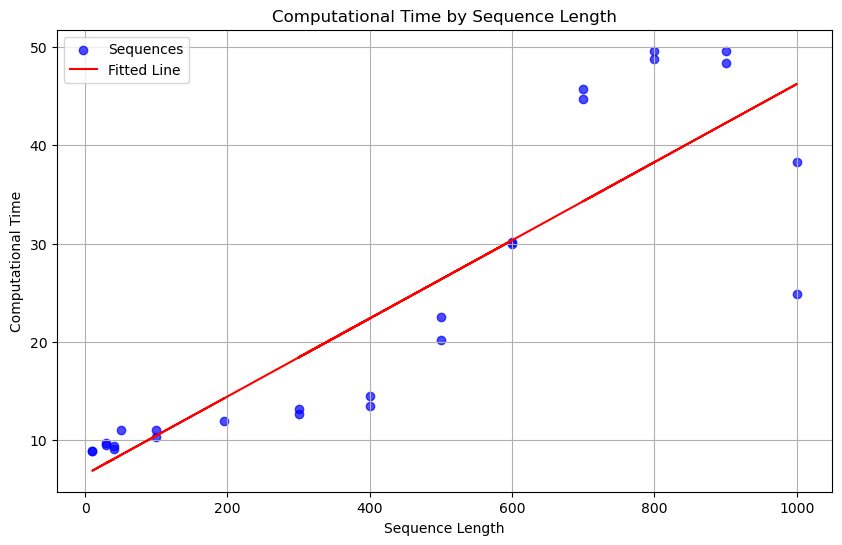

In [113]:
# Plot
plt.figure(figsize=(10, 6))

plt.scatter(seq_lengths_time, total_time, color='blue', label='Sequences', alpha=0.7)
# Calculate coefficients of the linear fit (polynomial of degree 1)
slope, intercept = np.polyfit(seq_lengths_time, total_time, 1)

# Generate y values for the fitted line, using the slope and intercept
fitted_line = np.polyval([slope, intercept], seq_lengths_time)


# Plot
plt.figure(figsize=(10, 6))

plt.scatter(seq_lengths_time, total_time, color='blue', label='Sequences', alpha=0.7)

# Add the fitted line
plt.plot(seq_lengths_time, fitted_line, color='red', label='Fitted Line')

plt.title('Computational Time by Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Computational Time')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [2]:
def extract_chain(input_file, output_file, chain_id):
    # Create a PDB parser
    parser = PDB.PDBParser()

    # Parse the structure from file
    structure = parser.get_structure("PDB_structure", input_file)

    # Create a PDB IO object for writing structures
    io = PDB.PDBIO()

    # Iterate over all models in the structure
    for model in structure:
        # We will save only the selected chain
        for chain in model:
            if chain.id == chain_id:
                # Set the structure for the output
                io.set_structure(chain)
                # Save the chain to a new file
                io.save(output_file)
                return

    print("Chain not found.")

In [3]:
input_file = '/home/max/stayahead/snellius2/outputs/6m0j.pdb'
output_file = '/home/max/stayahead/snellius2/outputs/ACE2.pdb'
chain_id = 'E'

In [4]:
extract_chain(input_file, output_file, chain_id)

/home/max/anaconda3/envs/analysis/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6962.
  warnings.warn(
/home/max/anaconda3/envs/analysis/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7020.
  warnings.warn(
/home/max/anaconda3/envs/analysis/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7034.
  warnings.warn(
/home/max/anaconda3/envs/analysis/lib/python3.11/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 7105.
  warnings.warn(
